## Tarea 1: Análisis de datos de Unimorph
- Fecha de entrega: martes 5 de octubre.
- Modalidad: crear la carpeta **tarea-1** en su cuenta de github. 
- La tarea es **individual** pero la **discusión grupal es recomendada.**
- Elija una lengua en [datos](https://github.com/orgs/unimorph/repositories). Elija una lengua distinta a la lengua ejemplo (Yanesha)
- En la carpeta "datos", hay archivos para algunas lenguas. Puede elegir otra :)
- **Recomendación:** implemente de forma ordenada y con comentarios. Trate, en lo posible, de poner comentarios en cada línea.
- No duden en preguntar en caso de cualquier problema!

## Leemos el archivo
Asumimos que la carpeta tarea-1 tiene adentro dos cosas: archivo de datos (de la lengua elegida) en la carpeta "datos", código en formato ipynb (notebook!). A modo de ejemplo, elegimos **Yanesha** para explicar los pasos de la tarea. 

In [1]:
## archivo en carpeta "datos"
## ame: Yanesha

import pandas as pd

## noten que especificamos la ruta
## ame
datos = pd.read_csv('datos/ame', sep='\t', header=None)
## puede cambiar estos nombres si lo desea
datos.columns = ['lemas','inflexiones','códigos']

In [2]:
## vamos a trabajar solo con verbos!

datos = datos[datos['códigos'].str.startswith('V')]

In [3]:
## nuestros datos!!! Cada fila indica una forma original, una inflexión del verbo y las coordenadas de la inflexión.

datos

,lemas,inflexiones,códigos
2,a'chenkateñets,a'chenkateñets,V;NFIN
3,achenkateñets,achenkateñets,V;NFIN
4,a'chenkateñets,a'chenkateñet,V;NO3P;FIN;REAL
5,achenkateñets,a'chenkateñet,V;NO3P;FIN;REAL
6,achenkateñets,a'chenkateñ,V;NO3;FIN;REAL
...,...,...,...
3762,yotteñets,seyottena,V;NO2P;FIN;REAL
3763,yotteñets,yeyottena,V;NO1P;FIN;REAL
3764,yotteñets,yottena,V;NO3;FIN;REAL
3765,yotteñets,yotteñets,V;NFIN


### Estos son nuestros datos! 3 listas!

In [4]:
## definamos conjuntos de lemas, inflexiones y códigos para cada lengua :)

#### LEMAS ####
## ame
lemas = list(datos['lemas'])

#### INFLEXIONES ####
## ame
inflexiones = list(datos['inflexiones'])

#### CÓDIGOS ####
## ame
codigos = list(datos['códigos'])

## Preguntas

### 1. ¿Cuántos lemas distintos hay?

In [5]:
## Defina la lista lemas_distintos, que guarda los lemas distintos de la lista lemas

lemas_distintos = []
## use un ciclo for para recorrer la lista lemas. 

### 2. ¿Cuántas inflexiones hay por lema distinto?

In [6]:
## Calcule la división entre el número de inflexiones y el número de lemas distintos

inflexiones_por_lema_distinto = 0

### 3. Defina la lista tokens_codigos, en que cada código está tokenizado por ";"

In [7]:
tokens_codigos = []
## use un ciclo for para recorrer la lista codigos. En cada iteración, use split(';') y guarde el resultado en tokens_codigos

### 4. ¿Cuál es el número promedio de símbolos usados para describir las inflexiones?

In [8]:
promedio_inflexiones = 0

## recorra la lista tokens_codigos con un ciclo for. En cada iteración, guarde el largo de la sublista en promedio_inflexiones.
## Finalmente, divida promedio_inflexiones por el largo de tokens_codigos!

### 5. Ahora, tokens_codigos es una lista de listas. Defina la lista lista_codigos, que guarda todos los strings usados para describir las inflexiones

In [9]:
lista_codigos = []
## use un ciclo for para recorrer la lista tokens_codigos. En cada iteración, use otro ciclo for, que recorra la sublista, y 
## guarde los strings en lista_codigos

### 6. ¿Cuántos símbolos se utilizan para definir las inflexiones?

In [10]:
## Defina la lista simbolos_distintos, que guarda los simbolos distintos de lista_codigos

simbolos_distintos = []
## use un ciclo for para recorrer la lista lista_codigos. 

### 7. Construya la lista triple_datos en donde cada elemento tiene la forma [lema,inflexión,código]

In [11]:
triple_datos = []

## recorra las listas usando los índices!

### 8. ¿Existen códigos para los cuales el lema es igual a su inflexión? Defina la lista lema_igual_inflexion, que en cada posición pone 1 si son iguales, o 0 en otro caso.

In [12]:
lema_igual_inflexion = []

## recorra la lista triple_datos. En cada interación, use una condición if. 

### 9. Usemos una librería!

In [13]:
!pip install jellyfish

In [14]:
## la distancia de hamming permite calcular la distancia entre strings. Un alto valor de la distancia de Hamming implica que los
## strings son distintos

import jellyfish as JF

JF.hamming_distance("a'chenkateñets","a'chenkateñet")

1

In [15]:
## a partir de la lista triple_datos, construya la lista distancia_largo_codigos, en que cada elemento tiene la forma [JF.hamming_distance(codigo,inflexión),largo(codigo)]

distancia_largo_codigos = []

### 10. Extraiga dos listas de distancia_largo_codigos: distancias y largo_codigos, que guardan las distancias entre lemas e inflexiones, y el largo de los códigos

In [16]:
distancias = []
largo_codigos = []

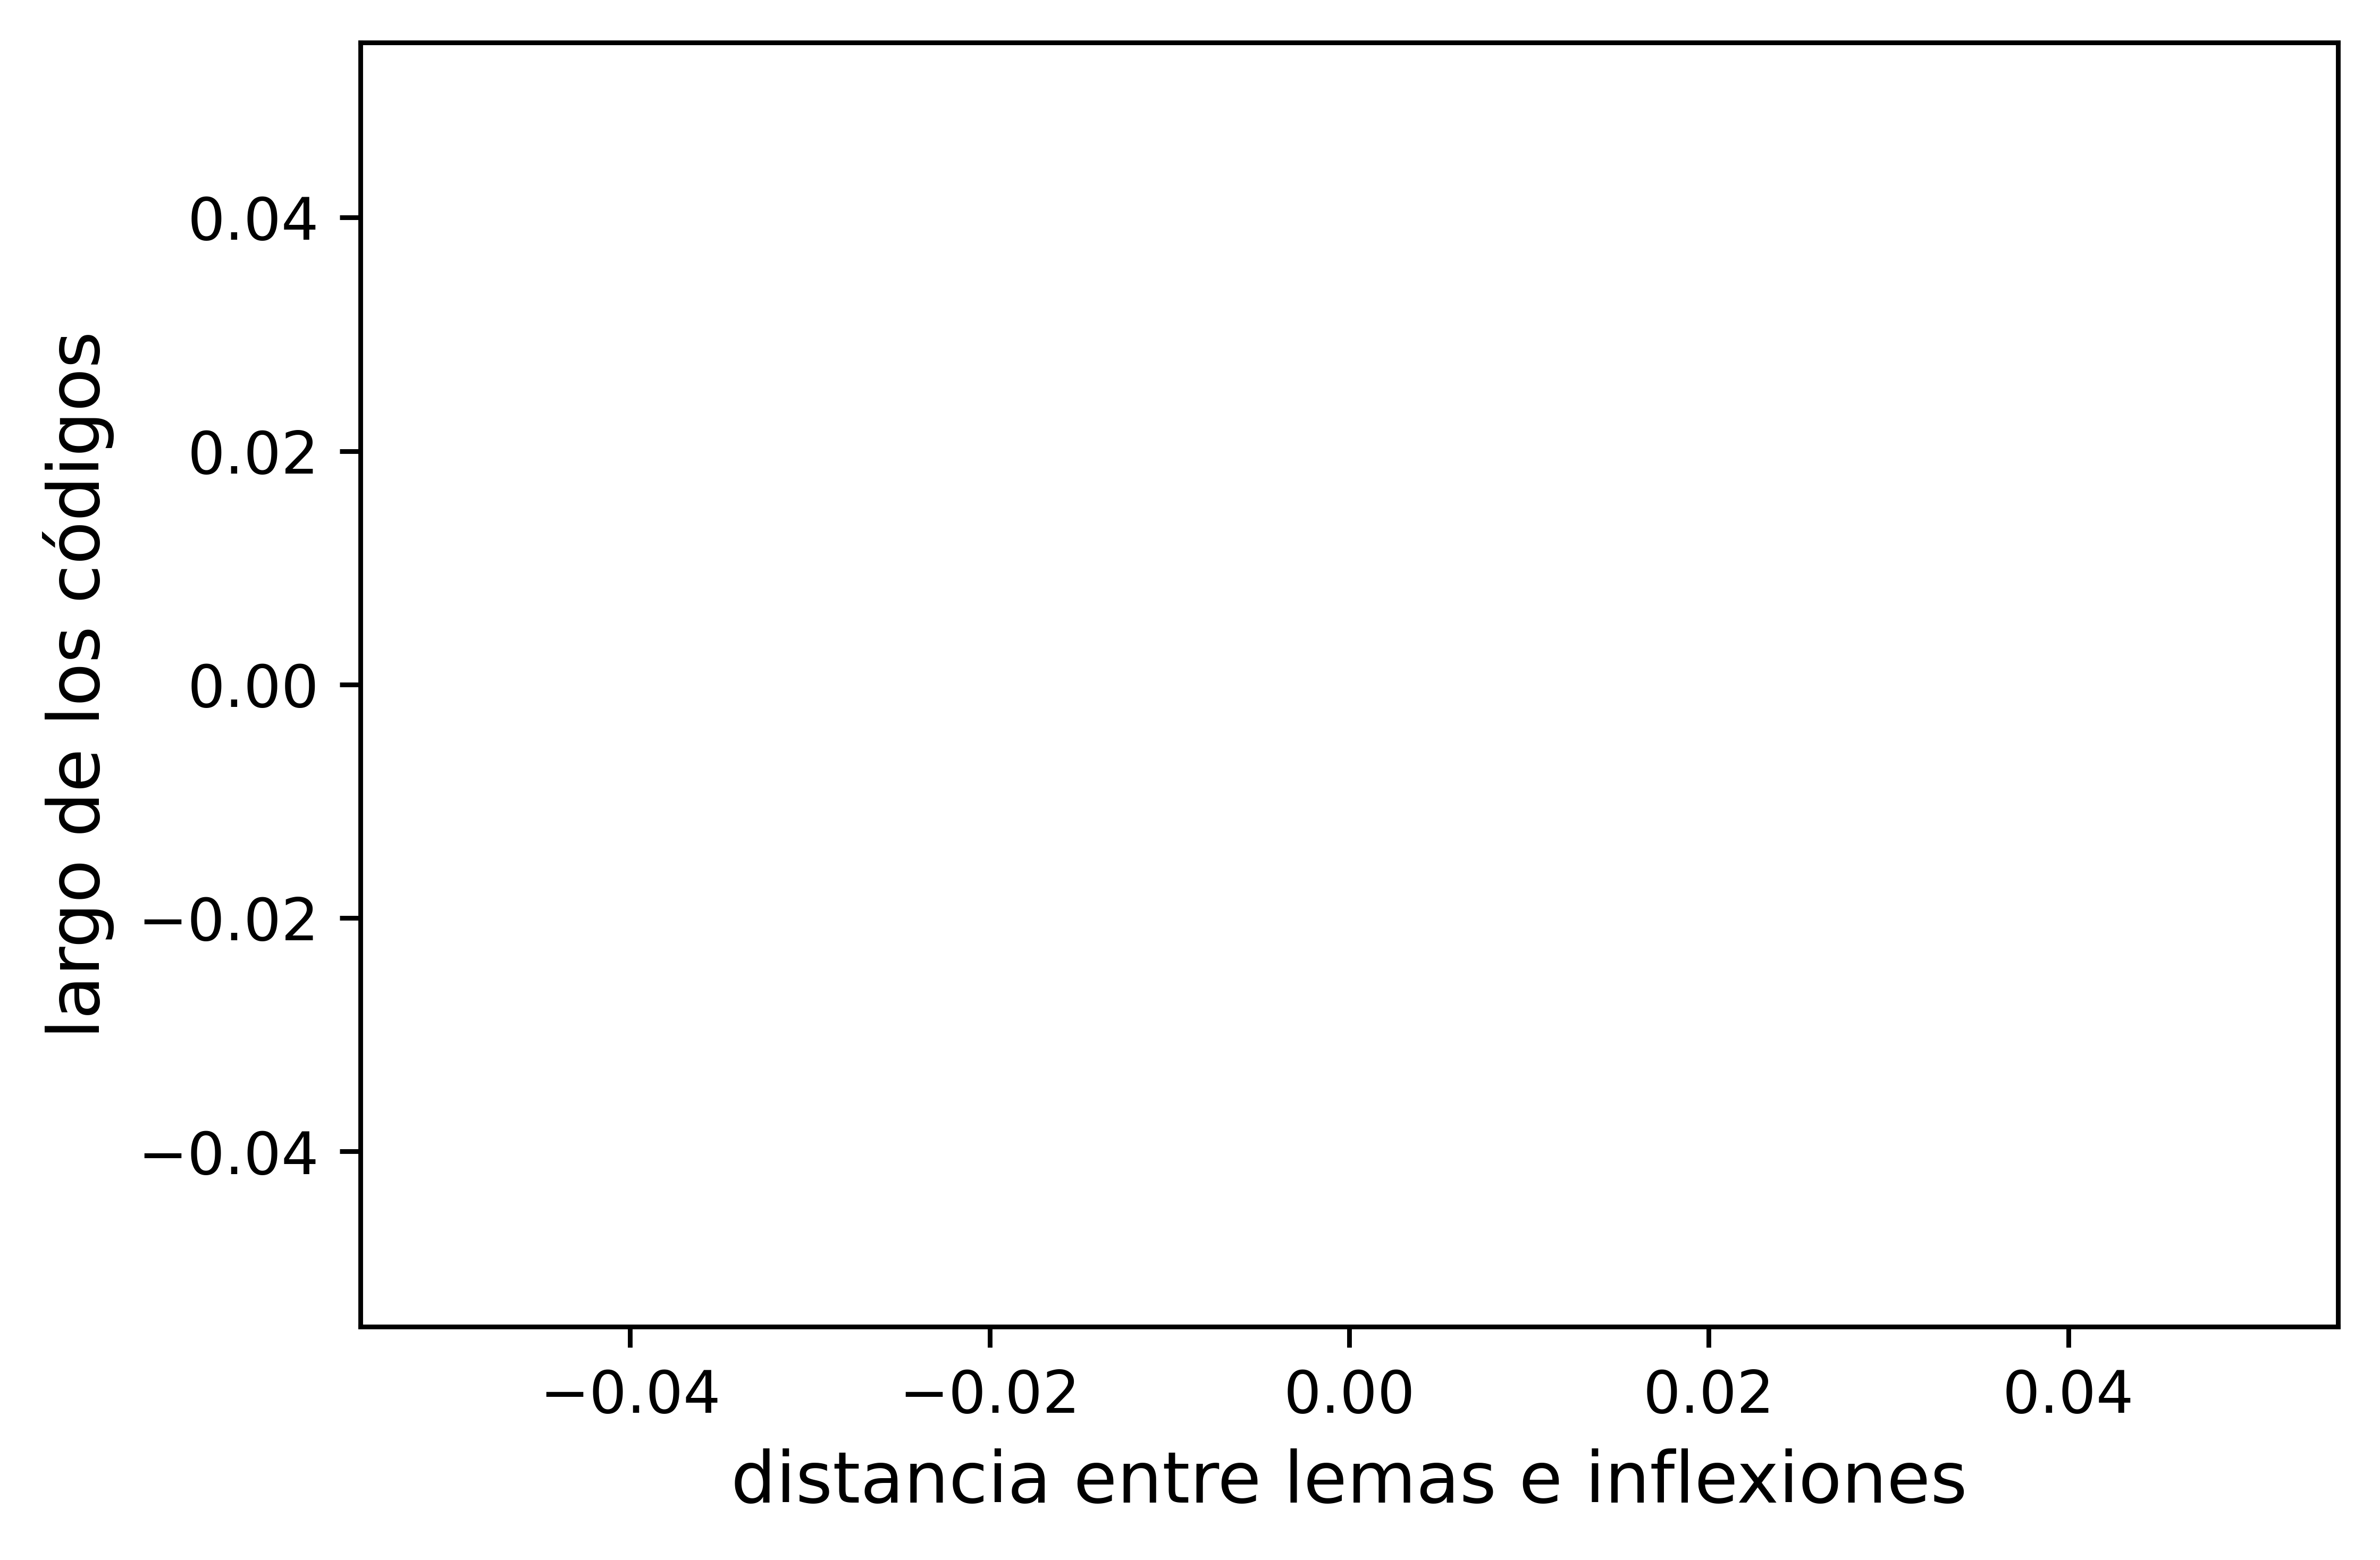

In [17]:
## ejecute el siguiente código!

import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)
    
ax.plot(distancias,largo_codigos,linewidth=0,marker='H',color='orange',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best')
plt.ylabel('largo de los códigos',fontsize=12)
plt.xlabel('distancia entre lemas e inflexiones',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('distanciavslargo.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### 11. Responda las siguientes preguntas. 
- ¿A partir de los cálculos realizados, qué podemos decir sobre la tipología morfológica de la lengua estudiada? Use en su respuesta algo de los cálculos realizados en relación a inflexiones y lemas. Puede explicar los calculos propuestos de manera informal.
- ¿Qué otros cálculos podrían hacerse?